In [2]:
from sklearn.datasets import make_blobs

In [3]:
x,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [4]:
x.shape,y.shape

((1000, 2), (1000,))

In [5]:
import matplotlib.pyplot as plt

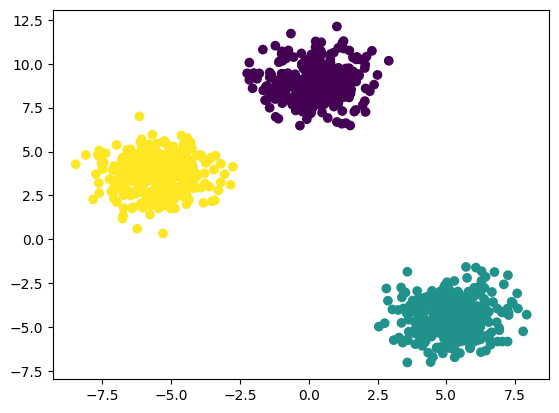

In [6]:
plt.scatter(x[:,0],x[:,1],c=y)

## elbow method

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

WCSS :  [41167.28340753901, 9544.872623190913, 1570.372399982784, 1398.31062284344, 1199.7300981270832, 1075.5273444391732, 920.296578406502, 867.0916600193449, 759.0290839394386, 650.6205960433315]


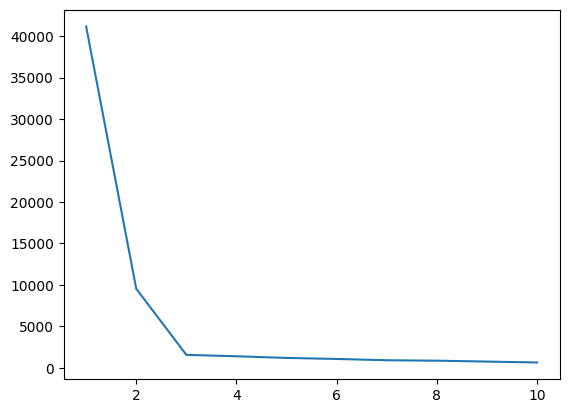

In [8]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

print("WCSS : ",wcss)
plt.plot(range(1,11),wcss)

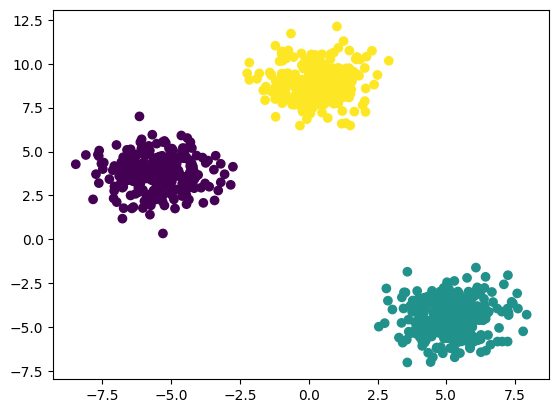

In [9]:
kmeans=KMeans(n_clusters=3)
y_label=kmeans.fit_predict(x_train)
plt.scatter(x_train[:,0],x_train[:,1],c=y_label)

## silhoute score

In [10]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sil_coefficient=[]
for k in range(2,11): # 2 because sil_score requires minimum 2 cluster
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(x_train)
    score=silhouette_score(x_train,labels=kmeans.labels_)

    sil_coefficient.append(score)


print(sil_coefficient)    


[0.7258310358179207, 0.8068049253852778, 0.6371021352736821, 0.49392009324160413, 0.3274047686765455, 0.32851146520332236, 0.5035554643309846, 0.33043850097923655, 0.3306298661156298]


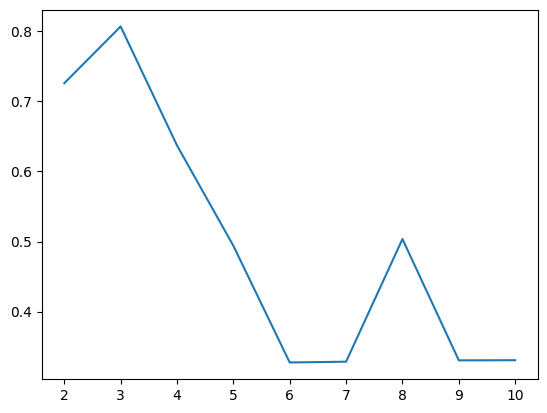

In [11]:
plt.plot(range(2,11),sil_coefficient)

## scratch code k-means

In [12]:
def distence(data,centroids):  # data must be in array form
    dist_list=[]
    for one_data in data:
        dist_for_each=[]
        for centroid in centroids:
            dist_for_each.append(np.sqrt(np.sum(np.square(one_data - centroid)))) # distence
        dist_list.append(dist_for_each)

    return dist_list

In [13]:
def cluster_finder(data,k,max_iter=100):
    num_of_dp=data.shape[0] # got number of data ponts means all rows
    k=min(num_of_dp,k)

    centroids=data[np.random.choice(num_of_dp,k,replace=False)] # choosing centroids randomly

    centroid_arr=[]
    for i in range(max_iter):
        centroid_arr.append(centroids.copy())

        dist_list=distence(data,centroids)
        labels=np.argmin(dist_list,axis=1)

        for j in range(k):
            new_cluster_points=data[labels==j]

            if (new_cluster_points.shape[0] > 0):
                centroids[j]=np.mean(new_cluster_points,axis=0)

        if(np.all(centroids[j]==centroid_arr[-1])):
            break

    return centroids,labels
    print(centroids,"\n",labels)

In [14]:
import numpy as np
data=np.random.rand(100,2)

In [15]:
centroids,labels=cluster_finder(data,3)

In [16]:
def plot(data,labels,centroids):
    for i in np.unique(labels):
        plt.scatter(data[labels==i,0],data[labels==i,1],label=f'Cluster {i}')
    plt.scatter(centroids[:,0],centroids[:,1],marker='x',color='red',s=100,label="Centroids")
    plt.legend(loc='upper right',fontsize=7)
    plt.grid(True)
    plt.show()

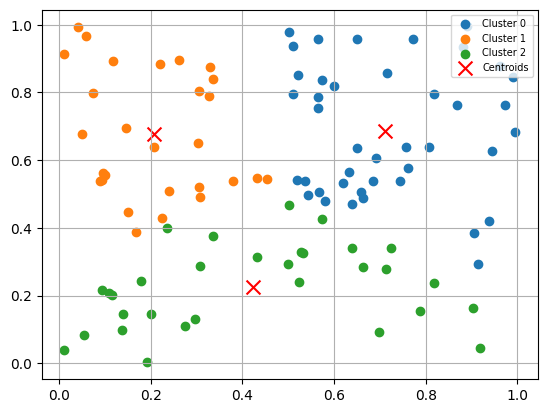

In [17]:
plot(data,labels,centroids)

# 3. Perform KNN with the library and plot the results. Print the Accuracy score, classification report and plot the confusion matrix. Use Diabetes and wine dataset for this.

In [18]:
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [19]:
import pandas as pd
wine=load_wine()
df=pd.DataFrame(data=wine.data,columns=wine.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [20]:
x=df.values
y=wine.target

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [23]:
prediction=knn.predict(x_test,)

In [24]:
accurecy=accuracy_score(y_test,prediction)
print("Accuracy score : ",accurecy)

Accuracy score :  0.75


In [25]:
print(confusion_matrix(y_test,prediction))

[[14  0  0]
 [ 0  9  5]
 [ 2  2  4]]


<Axes: >

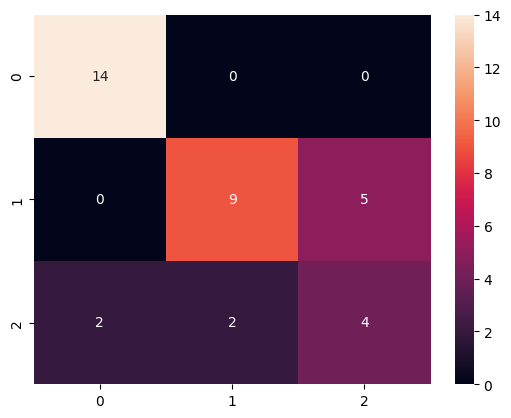

In [26]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,prediction),annot=True)

In [27]:
print("Classification report")
cm=classification_report(y_test,prediction)

Classification report


'              precision    recall  f1-score   support\n\n           0       0.88      1.00      0.93        14\n           1       0.82      0.64      0.72        14\n           2       0.44      0.50      0.47         8\n\n    accuracy                           0.75        36\n   macro avg       0.71      0.71      0.71        36\nweighted avg       0.76      0.75      0.75        36\n'

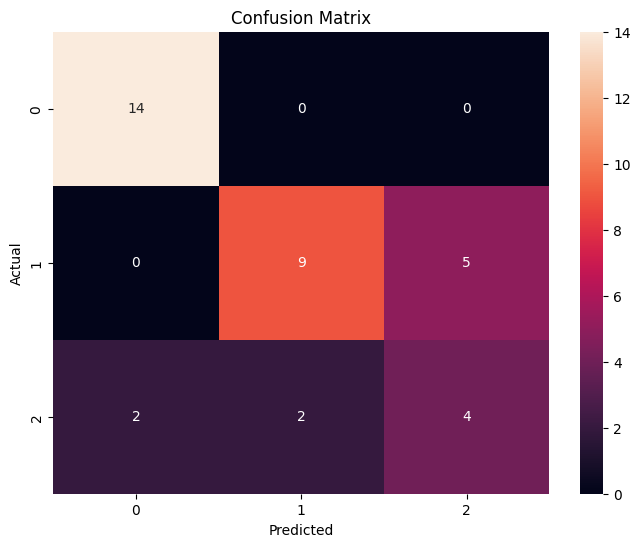

In [33]:
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
